## Cleaning Text
Now we are able to process data to analyze text, numbers and symbols for particular regular expressions that can be useful for data cleaning, representation, and decision making analyses. Let's start performing some data cleaning filtering

For this purpose we will first use the NLTK library characteristics (Natural Language Toolkit).

<code>
    Regular expressions and examples
    Data cleaning:
        Tokenining
        Removing punctuation
        Stemming and Lemmatizing
        Removing tags
    Text representation
            TF-IDF: Term frequencies (counter)
            Vector normalization
            Feature weighting (Inverse Document Frequency)\t
            Sklearn implementation\n
    Learning text representations\n
            Stopwords\n
            Bag of Words\n
            n-grams\n
            Training a (naive Bayes) Classifier with NLTK: film critiques example\n
            Training a (naive Bayes) Classifier with TextBlob: A Tweet Sentiment Analyzer\n
</code>

In [1]:
import math
import numpy as np

import nltk
#nltk.download()


### Tokenizing text into bags of words

NLTK makes it easy to convert documents-as-strings into word-vectors, a process called tokenizing.




In [2]:
from nltk.tokenize import word_tokenize

raw_docs = ["Here are some very simple basic sentences.",
"They won't be very interesting, I'm afraid.",
"The point of these examples is to _learn how basic text cleaning works_ on *very simple* data."]


tokenized_docs = [word_tokenize(doc) for doc in raw_docs]
print (tokenized_docs)

[['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences', '.'], ['They', 'wo', "n't", 'be', 'very', 'interesting', ',', 'I', "'m", 'afraid', '.'], ['The', 'point', 'of', 'these', 'examples', 'is', 'to', '_learn', 'how', 'basic', 'text', 'cleaning', 'works_', 'on', '*', 'very', 'simple', '*', 'data', '.']]


### Removing punctuation

Punctuation can help with tokenizers, but once you've done that, there's no reason to keep it around. There are tons of ways to remove punctuation.

Let's review some useful functions

re.escape: Return string with all non-alphanumerics backslashed; this is useful if you want to match an arbitrary literal string that may have regular expression metacharacters in it.

In [3]:
import string
import re
#nltk.download('punkt')

print(string.punctuation)
print (re.escape(string.punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [4]:
regex = re.compile('[%s]' % re.escape(string.punctuation)) 
tokenized_docs_no_punctuation = []
for sentence in tokenized_docs:
    new_sentence = []
    for token in sentence: 
        new_token = regex.sub(u'', token)
        if not new_token == u'':
            new_sentence.append(new_token)
    tokenized_docs_no_punctuation.append(new_sentence)
    
    print(sentence)
    print(new_sentence)
    print()

['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences', '.']
['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences']

['They', 'wo', "n't", 'be', 'very', 'interesting', ',', 'I', "'m", 'afraid', '.']
['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid']

['The', 'point', 'of', 'these', 'examples', 'is', 'to', '_learn', 'how', 'basic', 'text', 'cleaning', 'works_', 'on', '*', 'very', 'simple', '*', 'data', '.']
['The', 'point', 'of', 'these', 'examples', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data']



Punctuation symbols are removed, and those words containing a punctuation symbol are keeped and marked with an initial 'u'.


### Stemming and Lemmatizing

If you have taken linguistics, you may be familiar with morphology. This is the belief that words have a root form. If you want to get to the basic term meaning of the word, you can try applying a stemmer or lemmatizer. Here are three very popular methods ready to go right out of the NLTK box.

<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1539984207/stemminglemmatization_n8bmou.jpg">

In [5]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter   = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet_lemma  = WordNetLemmatizer()

words = ['cat','trouble','troubling','troubled','is','are','feet']
for word in words:
    print("---- ",word,"----")
    print('PS:',porter.stem(word))
    print('SS:',snowball.stem(word))
    print('WN:',wordnet_lemma.lemmatize(word))
    print('WN:',wordnet_lemma.lemmatize(word,pos="v"))
    print()


----  cat ----
PS: cat
SS: cat
WN: cat
WN: cat

----  trouble ----
PS: troubl
SS: troubl
WN: trouble
WN: trouble

----  troubling ----
PS: troubl
SS: troubl
WN: troubling
WN: trouble

----  troubled ----
PS: troubl
SS: troubl
WN: troubled
WN: trouble

----  is ----
PS: is
SS: is
WN: is
WN: be

----  are ----
PS: are
SS: are
WN: are
WN: be

----  feet ----
PS: feet
SS: feet
WN: foot
WN: feet



In [6]:

for doc in tokenized_docs_no_punctuation:
    final_doc = []
    for word in doc:
        final_doc.append(porter.stem(word))
        #final_doc.append(snowball.stem(word)) # requires 'corpora/wordnet' -> nltk.download()
        #final_doc.append(wordnet_lemma.lemmatize(word)) # requires 'corpora/wordnet' -> nltk.download()
    print()
    print('Before:',doc)
    print('After: ', final_doc)




Before: ['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences']
After:  ['here', 'are', 'some', 'veri', 'simpl', 'basic', 'sentenc']

Before: ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid']
After:  ['they', 'wo', 'nt', 'be', 'veri', 'interest', 'I', 'm', 'afraid']

Before: ['The', 'point', 'of', 'these', 'examples', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data']
After:  ['the', 'point', 'of', 'these', 'exampl', 'is', 'to', 'learn', 'how', 'basic', 'text', 'clean', 'work', 'on', 'veri', 'simpl', 'data']


In [7]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    return tag_dict.get(tag, wordnet.NOUN)

for doc in tokenized_docs_no_punctuation:
    final_doc = []
    for word in doc:
        final_doc.append(wordnet_lemma.lemmatize(word,get_wordnet_pos(word))) # requires 'corpora/wordnet' -> nltk.download()

    print()
    print('Before:',doc)
    print('After: ', final_doc)
    


Before: ['Here', 'are', 'some', 'very', 'simple', 'basic', 'sentences']
After:  ['Here', 'be', 'some', 'very', 'simple', 'basic', 'sentence']

Before: ['They', 'wo', 'nt', 'be', 'very', 'interesting', 'I', 'm', 'afraid']
After:  ['They', 'wo', 'nt', 'be', 'very', 'interest', 'I', 'm', 'afraid']

Before: ['The', 'point', 'of', 'these', 'examples', 'is', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'works', 'on', 'very', 'simple', 'data']
After:  ['The', 'point', 'of', 'these', 'example', 'be', 'to', 'learn', 'how', 'basic', 'text', 'cleaning', 'work', 'on', 'very', 'simple', 'data']


### Removing HTML entities and tags
We have it already implemented in NLTK!


In [8]:
test_string  ="<p>While many of the stories tugged <a> at the heartstrings, I never felt manipulated by the authors."
test_string +=" (Note: Part of the reason why I don't like the &quot;Chicken Soup for the Soul&quot;"
test_string +="series is that I feel that the authors are just dying to make the reader clutch for the box of tissues.)</a>"

print (test_string)

<p>While many of the stories tugged <a> at the heartstrings, I never felt manipulated by the authors. (Note: Part of the reason why I don't like the &quot;Chicken Soup for the Soul&quot;series is that I feel that the authors are just dying to make the reader clutch for the box of tissues.)</a>


In [9]:
def clean_html(html):
    """Copied from NLTK package.
    Remove HTML markup from the given string.

    :param html: the HTML string to be cleaned
    :type html: str
    :rtype: str"""
    # First we remove inline JavaScript/CSS:
    cleaned = re.sub(r"(?is)<(script|style).*?>.*?(</\1>)", "", html.strip())
    
    # Then we remove html comments. This has to be done before removing regular
    # tags since comments can contain '>' characters.
    cleaned = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", cleaned)
    
    # Next we can remove the remaining tags:
    cleaned = re.sub(r"(?s)<.*?>", " ", cleaned)
    
    # Finally, we deal with whitespace
    cleaned = re.sub(r"&nbsp;", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    cleaned = re.sub(r"  ", " ", cleaned)
    return cleaned.strip()

print("\n--- Cleaned text:---" )
print(clean_html(test_string))
#Use from bs4 import BeautifulSoup  : for improved versions of tag cleaning 


--- Cleaned text:---
While many of the stories tugged at the heartstrings, I never felt manipulated by the authors. (Note: Part of the reason why I don't like the &quot;Chicken Soup for the Soul&quot;series is that I feel that the authors are just dying to make the reader clutch for the box of tissues.)


# Text representation
Once text is analyzed based on regular expressions and cleaned by filtering using some of the previous tools, we can proceed to represent it in order to perform posterior analyses.

We need to start thinking about how to translate collections of texts into quantifiable phenomena.  

Some classical aproaches:
<code>
    One-Hot encoding or Bag of Words
    Tf-IDF
</code>

<img src="https://miro.medium.com/max/1800/1*ArM6Z5jeptCQ082DYn9nDQ.png">

## The Vector Space Model of text: TF-IDF (Term Frequency - Inverse Document Frequency)

We can think about word frequencies.

Example with histograms of visual words representation:
<img src="VisualWords.png">


### Basic term frequencies
First, let's review how to get a count of terms per document: a term frequency vector.

In [10]:
mydoclist = ['Julie loves me more than Linda loves me',
'Jane likes me more than Julie loves me',
'He likes basketball more than baseball']

from collections import Counter

for doc in mydoclist:
    tf = Counter()
    for word in doc.split():
        tf[word] +=1
    print (tf.items())

dict_items([('Julie', 1), ('loves', 2), ('me', 2), ('more', 1), ('than', 1), ('Linda', 1)])
dict_items([('Jane', 1), ('likes', 1), ('me', 2), ('more', 1), ('than', 1), ('Julie', 1), ('loves', 1)])
dict_items([('He', 1), ('likes', 1), ('basketball', 1), ('more', 1), ('than', 1), ('baseball', 1)])


Let's call this a first stab at representing documents quantitatively, just by their word counts (also thinking that we may have previously filtered and cleaned the text using previous approaches).

In [11]:
def build_lexicon(corpus): # define a set with all possible words included in all the sentences or "corpus"
    lexicon = set()
    for doc in corpus:
        lexicon.update([word for word in doc.split()])
    return lexicon

def freq(term, document):
    return document.split().count(term)

def tf(term, document):
    return freq(term, document)


vocabulary = build_lexicon(mydoclist)

doc_term_matrix = []
print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']\n')

for doc in mydoclist:    
    print ('The doc is "' + doc + '"')
    tf_vector = [tf(word, doc) for word in vocabulary]
    tf_vector_string = ', '.join(format(freq, 'd') for freq in tf_vector)
    
    print ('The tf vector for Document %d is [%s]|\n' % ((mydoclist.index(doc)+1), tf_vector_string))
    doc_term_matrix.append(tf_vector)

print ('\nAll combined, here is our master document term matrix: ')
print (doc_term_matrix)

Our vocabulary vector is [likes, Linda, more, baseball, me, basketball, Julie, Jane, than, loves, He]

The doc is "Julie loves me more than Linda loves me"
The tf vector for Document 1 is [0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0]|

The doc is "Jane likes me more than Julie loves me"
The tf vector for Document 2 is [1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0]|

The doc is "He likes basketball more than baseball"
The tf vector for Document 3 is [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]|


All combined, here is our master document term matrix: 
[[0, 1, 1, 0, 2, 0, 1, 0, 1, 2, 0], [1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 0], [1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1]]


In [12]:
import numpy as np
from scipy.spatial import distance_matrix

distance_matrix(np.array(doc_term_matrix),np.array(doc_term_matrix))

array([[0.        , 2.        , 3.74165739],
       [2.        , 0.        , 3.16227766],
       [3.74165739, 3.16227766, 0.        ]])

Okay, that seems reasonable enough. If any of you have any experience with machine learning, what you've just seen is the creation of a feature space. Now every document is in the same feature space, meaning that we can represent the entire corpus in the same dimensional space without having lost too much information.

### Normalizing vectors to L2 Norm
Once you've got your data in the same feature space, you can start applying some machine learning methods; classifying, clustering, and so on. But actually, we've got a few problems. Words aren't all equally informative.

If words appear too frequently in a single document, they're going to muck up our analysis. We want to perform some scaling of each of these term frequency vectors into something a bit more representative. In other words, we need to do some vector normalizing.

One possibility is to ensure that the L2 norm of each vector is equal to 1. Here's some code that shows how this is done.



In [13]:
def l2_normalizer(vec):
    denom = np.sum([el**2 for el in vec])
    return [(el / math.sqrt(denom)) for el in vec]

doc_term_matrix_l2 = []
for vec in doc_term_matrix:
    doc_term_matrix_l2.append(l2_normalizer(vec))

print ('A regular old document term matrix: ') 
print (np.matrix(doc_term_matrix))
print ('\nA document term matrix with row-wise L2 norms of 1:')
print (np.matrix(doc_term_matrix_l2))

A regular old document term matrix: 
[[0 1 1 0 2 0 1 0 1 2 0]
 [1 0 1 0 2 0 1 1 1 1 0]
 [1 0 1 1 0 1 0 0 1 0 1]]

A document term matrix with row-wise L2 norms of 1:
[[0.         0.28867513 0.28867513 0.         0.57735027 0.
  0.28867513 0.         0.28867513 0.57735027 0.        ]
 [0.31622777 0.         0.31622777 0.         0.63245553 0.
  0.31622777 0.31622777 0.31622777 0.31622777 0.        ]
 [0.40824829 0.         0.40824829 0.40824829 0.         0.40824829
  0.         0.         0.40824829 0.         0.40824829]]


In [14]:
import numpy as np
from scipy.spatial import distance_matrix

distance_matrix(np.array(doc_term_matrix_l2),np.array(doc_term_matrix_l2))

array([[0.        , 0.59735444, 1.23636381],
       [0.59735444, 0.        , 1.10697937],
       [1.23636381, 1.10697937, 0.        ]])

You can see immediately that we've scaled down vectors such that each element is between [0, 1], without losing too much valuable information.

Why would we care about this kind of normalizing? Think about it this way; if you wanted to make a document seem more related to a particular topic than it actually was, you might try boosting the likelihood of its inclusion into a topic by repeating the same word over and over and over again. Frankly, at a certain point, we're getting a diminishing return on the informative value of the word. So we need to scale down words that appear too frequently in a document.

### IDF frequency weighting
But we're still not there yet. Just as all words aren't equally valuable within a document, **not all words are valuable across all documents**. We can try reweighting every word by its inverse document frequency. Let's see what's involved in that.
$$ idf_i = 1 + log(\frac{1+ \text{total documents}}{1 +\text{documents with term i}})$$

In [15]:
def numDocsContaining(word, doclist):
    '''Num documents containing the word'''
    doccount = 0
    for doc in doclist:
        if freq(word, doc) > 0:
            doccount +=1
    return doccount 

def idf(word, doclist):
    n_samples = len(doclist) #numer of documents
    df = numDocsContaining(word, doclist) 
    return 1 + np.log( (1+ n_samples) / (1 +float(df)) )

my_idf_vector = [idf(word, mydoclist) for word in vocabulary]

print ('Our vocabulary vector is [' + ', '.join(list(vocabulary)) + ']\n')
print ('The inverse document frequency (IDF) vector is\n [' 
       + ', '.join(format(freq, 'f') for freq in my_idf_vector) + ']')

print()
print("Word idf in descending score:")
sorted([(idf(word, mydoclist),word) for word in vocabulary])[::-1]

Our vocabulary vector is [likes, Linda, more, baseball, me, basketball, Julie, Jane, than, loves, He]

The inverse document frequency (IDF) vector is
 [1.287682, 1.693147, 1.000000, 1.693147, 1.287682, 1.693147, 1.287682, 1.693147, 1.000000, 1.287682, 1.693147]

Word idf in descending score:


[(1.6931471805599454, 'basketball'),
 (1.6931471805599454, 'baseball'),
 (1.6931471805599454, 'Linda'),
 (1.6931471805599454, 'Jane'),
 (1.6931471805599454, 'He'),
 (1.2876820724517808, 'me'),
 (1.2876820724517808, 'loves'),
 (1.2876820724517808, 'likes'),
 (1.2876820724517808, 'Julie'),
 (1.0, 'than'),
 (1.0, 'more')]

Now we have a general sense of information values per term in our vocabulary, accounting for their relative frequency across the entire corpus. Recall that this is an inverse! The lower the value, the more frequent it is.

To get TF-IDF weighted word vectors, we have to perform the simple calculation of **tf * idf**.

In [16]:
def build_idf_matrix(idf_vector):
    idf_mat = np.zeros((len(idf_vector), len(idf_vector)))
    np.fill_diagonal(idf_mat, idf_vector)
    return idf_mat

my_idf_matrix = build_idf_matrix(my_idf_vector)
print (my_idf_matrix)
print(my_idf_matrix.shape)

[[1.28768207 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         1.69314718 0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         1.69314718 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.28768207 0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.69314718
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.28768207 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.69314718 0.         0.         0.        ]
 [0.         0.         0.         0.         0.

Now we have converted our IDF vector into a matrix of size BxB, where the diagonal is the IDF vector. That means we can perform now multiply every term frequency vector by the inverse document frequency matrix. Then to make sure we are also accounting for words that appear too frequently within documents, we'll normalize each document using L2 norm.

In [17]:
doc_term_matrix_tfidf = []

#performing tf-idf matrix multiplication
for tf_vector in doc_term_matrix:
    doc_term_matrix_tfidf.append(np.dot(tf_vector, my_idf_matrix))

#normalizing
doc_term_matrix_tfidf_l2 = []
for tfidf_vector in doc_term_matrix_tfidf:
    doc_term_matrix_tfidf_l2.append(l2_normalizer(tfidf_vector))
                                    
print (vocabulary)
print (np.matrix(doc_term_matrix_tfidf_l2)) # np.matrix() just to make it easier to look at

{'likes', 'Linda', 'more', 'baseball', 'me', 'basketball', 'Julie', 'Jane', 'than', 'loves', 'He'}
[[0.         0.38060387 0.22479078 0.         0.57891811 0.
  0.28945906 0.         0.22479078 0.57891811 0.        ]
 [0.3172591  0.         0.24637999 0.         0.6345182  0.
  0.3172591  0.41715759 0.24637999 0.3172591  0.        ]
 [0.36778358 0.         0.28561676 0.48359121 0.         0.48359121
  0.         0.         0.28561676 0.         0.48359121]]


In [18]:
import numpy as np
from scipy.spatial import distance_matrix

distance_matrix(np.array(doc_term_matrix_tfidf_l2),np.array(doc_term_matrix_tfidf_l2))

array([[0.        , 0.70199354, 1.32029692],
       [0.70199354, 0.        , 1.21866879],
       [1.32029692, 1.21866879, 0.        ]])

Now let's see an efficient implementation of the previous approach using scikits-learn, which ensures that you don't have to worry about the efficiency of all the previous steps.

**NOTE**: The values you get from the TfidfVectorizer/TfidfTransformer will be different than what we have computed by hand. This is because scikits-learn uses an adapted version of Tfidf to deal with divide-by-zero errors.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

count_vectorizer = CountVectorizer(min_df=1)
term_freq_matrix = count_vectorizer.fit_transform(mydoclist)
print ("Vocabulary:", count_vectorizer.vocabulary_,'\n')

tfidf = TfidfTransformer(norm="l2")
tfidf.fit(term_freq_matrix)
tf_idf_matrix = tfidf.transform(term_freq_matrix)

print(mydoclist)
print (tf_idf_matrix.todense())

Vocabulary: {'julie': 4, 'loves': 7, 'me': 8, 'more': 9, 'than': 10, 'linda': 6, 'jane': 3, 'likes': 5, 'he': 2, 'basketball': 1, 'baseball': 0} 

['Julie loves me more than Linda loves me', 'Jane likes me more than Julie loves me', 'He likes basketball more than baseball']
[[0.         0.         0.         0.         0.28945906 0.
  0.38060387 0.57891811 0.57891811 0.22479078 0.22479078]
 [0.         0.         0.         0.41715759 0.3172591  0.3172591
  0.         0.3172591  0.6345182  0.24637999 0.24637999]
 [0.48359121 0.48359121 0.48359121 0.         0.         0.36778358
  0.         0.         0.         0.28561676 0.28561676]]


In [20]:
import pandas as pd
# print idf values
df_idf = pd.DataFrame(tfidf.idf_, index=count_vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

,idf_weights
more,1.000000
than,1.000000
julie,1.287682
likes,1.287682
loves,1.287682
me,1.287682
baseball,1.693147
basketball,1.693147
he,1.693147
jane,1.693147


Or more directly



In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 1)
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)

print (tfidf_matrix.todense())

[[0.         0.         0.         0.         0.28945906 0.
  0.38060387 0.57891811 0.57891811 0.22479078 0.22479078]
 [0.         0.         0.         0.41715759 0.3172591  0.3172591
  0.         0.3172591  0.6345182  0.24637999 0.24637999]
 [0.48359121 0.48359121 0.48359121 0.         0.         0.36778358
  0.         0.         0.         0.28561676 0.28561676]]


And we can fit new observations into this vocabulary space like so:


In [22]:
new_docs = ['He watches basketball and baseball', 'Julie likes to play basketball', 'Jane loves to play baseball']
new_term_freq_matrix = tfidf_vectorizer.transform(new_docs)
print (tfidf_vectorizer.vocabulary_)
print (new_term_freq_matrix.todense())

{'julie': 4, 'loves': 7, 'me': 8, 'more': 9, 'than': 10, 'linda': 6, 'jane': 3, 'likes': 5, 'he': 2, 'basketball': 1, 'baseball': 0}
[[0.57735027 0.57735027 0.57735027 0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.68091856 0.         0.         0.51785612 0.51785612
  0.         0.         0.         0.         0.        ]
 [0.62276601 0.         0.         0.62276601 0.         0.
  0.         0.4736296  0.         0.         0.        ]]


Note that we didn't get words like 'watches' in the new_term_freq_matrix. That's because we trained the object on the documents in mydoclist, and that word doesn't appear in the vocabulary from that corpus. In other words, it's out of the lexicon.

### Learning text representations
When using NLTK classifier, it is noted that the classifer expects dict style feature sets, so we need to transform the text into a dict.
We can use previous TF-IDF. Let's see another implementation: Bag of Words.

In [23]:
# First, write a Feature extractor (the following is taken from nltk-trainer package)

# download featx.py (written by Perkins)

from nltk import probability

def bag_of_words(words):
        return dict([(word, True) for word in words])

def bag_of_words_in_set(words, wordset):
        return bag_of_words(set(words) & wordset)
    
def word_counts(words):
        return dict(probability.FreqDist((w for w in words)))

def word_counts_in_set(words, wordset):
        return word_counts((w for w in words if w in wordset))

def train_test_feats(label, instances, featx=bag_of_words, fraction=0.75):
        labeled_instances = [(featx(i), label) for i in instances]
        
        if fraction != 1.0:
                l = len(instances)
                cutoff = int(math.ceil(l * fraction))
                return labeled_instances[:cutoff], labeled_instances[cutoff:]
        else:
                return labeled_instances, labeled_instances

In [24]:
bag_of_words(['this', 'is', 'awesome'])

{'this': True, 'is': True, 'awesome': True}

In [25]:
def bag_of_words_not_in_set(words, badwords):
    return bag_of_words(set(words) - set(badwords))

bag_of_words_not_in_set(['this','is','awesome'],['this'])

{'awesome': True, 'is': True}

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santisegui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords

def bag_of_non_stopwords(words, stopfile = 'english'):
    badwords = stopwords.words(stopfile)
    return bag_of_words_not_in_set(words, badwords)

bag_of_non_stopwords(['this','is','awesome'])

#nltk.download()   # try to use this is you need some package

{'awesome': True}

In [28]:
#nltk.download()   # try to use this is you need some package
from nltk.corpus import stopwords
print (stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Training a (naive Bayes) Classifier with TextBlob: A Tweet Sentiment Analyzer


We will train a simple sentiment analyzer trained on a small dataset of fake tweets. To begin, we’ll import the text.classifiers and create some training and test data.

https://blog.twitter.com/2012/a-new-barometer-for-the-election

"( Wednesday, August 1, 2012 | By Adam Sharp (@AdamS) [16:00 UTC] ) One glance at the numbers, and it’s easy to see why pundits are already calling 2012 “the Twitter election.” More Tweets are sent every two days today than had ever been sent prior to Election Day 2008 — and Election Day 2008’s Tweet volume represents only about six minutes of Tweets today."

"Each day, the Index evaluates and weighs the sentiment of Tweets mentioning Obama or Romney relative to the more than 400 million Tweets sent on all other topics. For example, a score of 73 for a candidate indicates that Tweets containing their name or account name are on average more positive than 73 percent of all Tweets."

<img src="Tweetpolitics.png\">

In [29]:
!pip install -U textblob
#!conda install -c https://conda.anaconda.org/sloria textblob -y


Requirement already up-to-date: textblob in /Users/santisegui/opt/anaconda3/lib/python3.8/site-packages (0.15.3)


In [30]:
from textblob.classifiers import NaiveBayesClassifier

train = [
    ('I love this sandwich.', 'pos'),
    ('This is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('This is my best work.', 'pos'),
    ("What an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('He is my sworn enemy!', 'neg'),
    ('My boss is horrible.', 'neg')
]
test = [
    ('The beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]



We create a new classifier by passing training data into the constructor for a NaiveBayesClassifier.



In [31]:
cl = NaiveBayesClassifier(train)

In [32]:
cl.show_informative_features(10)

Most Informative Features
          contains(this) = True              neg : pos    =      2.3 : 1.0
          contains(this) = False             pos : neg    =      1.8 : 1.0
          contains(This) = False             neg : pos    =      1.6 : 1.0
            contains(an) = False             neg : pos    =      1.6 : 1.0
             contains(I) = False             pos : neg    =      1.4 : 1.0
             contains(I) = True              neg : pos    =      1.4 : 1.0
            contains(He) = False             pos : neg    =      1.2 : 1.0
            contains(My) = False             pos : neg    =      1.2 : 1.0
          contains(What) = False             neg : pos    =      1.2 : 1.0
         contains(about) = False             neg : pos    =      1.2 : 1.0


We can now classify arbitrary text using the NaiveBayesClassifier.classify(text) method.

In [33]:
cl.classify("Their burgers are amazing")  # "pos"

'pos'

In [34]:
cl.classify("I don't like their pizza.")  # "neg"

'neg'

Another way to classify strings of text is to use TextBlob objects. You can pass classifiers into the constructor of a TextBlob.


In [35]:
import textblob
blob = textblob.TextBlob("The beer was amazing. "
                "But the hangover was horrible. My boss was not happy.", classifier=cl)
print (blob)

The beer was amazing. But the hangover was horrible. My boss was not happy.


You can then call the classify() method on the blob.



In [36]:
blob.classify()  # "neg"

'neg'

You can also take advantage of TextBlob’s sentence tokenization and classify each sentence indvidually.

In [37]:
for sentence in blob.sentences:
    print(sentence)
    print(sentence.classify())
# "pos", "neg", "neg"

The beer was amazing.
pos
But the hangover was horrible.
neg
My boss was not happy.
neg


In [38]:
cl.accuracy(test)  

0.8333333333333334

We can improve our classifier by adding more training and test data. Here we’ll add data from the movie review corpus which was downloaded with NLTK.



In [39]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/santisegui/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [40]:
import random
from nltk.corpus import movie_reviews

reviews = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(reviews)

new_train, new_test = reviews[0:300], reviews[301:400]

print('Review:' )
print(' '.join(new_train[0][0]))
print("\nSentiment: "+ new_train[0][1])

Review:
trees lounge is the directoral debut from one of my favorite actors , steve buscemi . he gave memorable performences in in the soup , fargo , and reservoir dogs . now he tries his hand at writing , directing and acting all in the same flick . the movie starts out awfully slow with tommy ( buscemi ) hanging around a local bar the " trees lounge " and him pestering his brother . it ' s obvious he a loser . but as he says " it ' s better i ' m a loser and know i am , then being a loser and not thinking i am . " well put . the story starts to take off when his uncle dies , and tommy , not having a job , decides to drive an ice cream truck . well , the movie starts to pick up with him finding a love interest in a 17 year old girl named debbie ( chloe sevigny ) and . . . i liked this movie alot even though it did not reach my expectation . after you ' ve seen him in fargo and reservoir dogs , you know he is capable of a better performence . i think his brother , michael , did an exce

Let’s see what one of these documents looks like.



In [41]:
print(new_train[0])

(['trees', 'lounge', 'is', 'the', 'directoral', 'debut', 'from', 'one', 'of', 'my', 'favorite', 'actors', ',', 'steve', 'buscemi', '.', 'he', 'gave', 'memorable', 'performences', 'in', 'in', 'the', 'soup', ',', 'fargo', ',', 'and', 'reservoir', 'dogs', '.', 'now', 'he', 'tries', 'his', 'hand', 'at', 'writing', ',', 'directing', 'and', 'acting', 'all', 'in', 'the', 'same', 'flick', '.', 'the', 'movie', 'starts', 'out', 'awfully', 'slow', 'with', 'tommy', '(', 'buscemi', ')', 'hanging', 'around', 'a', 'local', 'bar', 'the', '"', 'trees', 'lounge', '"', 'and', 'him', 'pestering', 'his', 'brother', '.', 'it', "'", 's', 'obvious', 'he', 'a', 'loser', '.', 'but', 'as', 'he', 'says', '"', 'it', "'", 's', 'better', 'i', "'", 'm', 'a', 'loser', 'and', 'know', 'i', 'am', ',', 'then', 'being', 'a', 'loser', 'and', 'not', 'thinking', 'i', 'am', '.', '"', 'well', 'put', '.', 'the', 'story', 'starts', 'to', 'take', 'off', 'when', 'his', 'uncle', 'dies', ',', 'and', 'tommy', ',', 'not', 'having', 'a'

We can now update our classifier with the new training data using the update(new_data) method, as well as test it using the larger test dataset.



In [42]:
cl.update(new_train) # it takes a while
accuracy = cl.accuracy(new_test) 
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.797979797979798


Here’s the full, updated script:



In [43]:
train = [
    ('I love this sandwich.', 'pos'),
    ('This is an amazing place!', 'pos'),
    ('I feel very good about these beers.', 'pos'),
    ('This is my best work.', 'pos'),
    ("What an awesome view", 'pos'),
    ('I do not like this restaurant', 'neg'),
    ('I am tired of this stuff.', 'neg'),
    ("I can't deal with this", 'neg'),
    ('He is my sworn enemy!', 'neg'),
    ('My boss is horrible.', 'neg')
]
test = [
    ('The beer was good.', 'pos'),
    ('I do not enjoy my job', 'neg'),
    ("I ain't feeling dandy today.", 'neg'),
    ("I feel amazing!", 'pos'),
    ('Gary is a friend of mine.', 'pos'),
    ("I can't believe I'm doing this.", 'neg')
]

processed_features = []
def clean_text(data):
    for sentence in range(0, len(data)):  
        # Remove all the special characters
        processed_feature = re.sub(r'\W', ' ', str(data[sentence][0]))

        # remove all single characters
        processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

        # Remove single characters from the start
        processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

        # Substituting multiple spaces with single space
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

        # Removing prefixed 'b'
        processed_feature = re.sub(r'^b\s+', '', processed_feature)

        # Converting to Lowercase
        processed_feature = processed_feature.lower()

        data[sentence] = (processed_feature,data[sentence][1])
    return data

In [44]:
train_clean = clean_text(train)
test_clean = clean_text(test)

cl = NaiveBayesClassifier(train_clean)
accuracy = cl.accuracy(test_clean)
print("Accuracy: {0}".format(accuracy))

Accuracy: 0.8333333333333334


# Read data from moneycontrol
Let's get something more complex!! An html page from moneycontrol

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html><head><meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=0" /><meta http-equiv="x-ua-compatible" content="ie=edge"><link href="https://fonts.googleapis.com/css?family=Noto+Serif:400,700" rel="stylesheet" defer>   <meta charset="utf-8"><title>Polycab India Q4 net profit down 27.3%; to spend Rs 175-200cr annually on capex</title><meta name="description" content="Board has recommended a final dividend of Rs 3 per equity share" /><meta name="news_keywords" content="Polycab,Q4,net profit,profit,revenue,wires,cables" /><meta name="Keywords" content="Polycab,Q4,net profit,profit,revenue,wires,cables"><meta content="NOODP" name="robots"><meta http-equiv="Content-Type" content="text/html; charset=utf-8" /><meta http-equiv="Last-Modified" content="2019-05-15T02:17:43+05:30"/><meta name="Last-Modified" content="2019-05-1
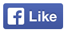
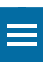

In [45]:
import requests

### Lets get a document from moneycontrol
#Get each article from site
url = 'https://www.moneycontrol.com/news/business/earnings/polycab-india-q4-net-profit-down-27-3-to-spend-rs-175-200cr-annually-on-capex-3972161.html'
results = requests.get(url)
print(results.text)

After cheking this website we have seen that the new is located within the  
<div class="arti-flow" id="article-main"> </code></text>-->

So let's get this text using the **BeautifulSoup**

In [46]:
from bs4 import BeautifulSoup
def clean_html_text(text):
    #Extract text
    results_text = BeautifulSoup(text)

    # look for the area where the new is located
    extract_text = results_text.find(class_='arti-flow')
    # clean the text
    clean_text = re.sub(r'<[^>]*?>', '', extract_text.text)
    # tags since comments can contain '>' characters.
    clean_text = re.sub(r"(?s)<!--(.*?)-->[\n]?", "", clean_text)
    clean_text = re.sub(r"\n", "", clean_text)
    return clean_text

raw_doc = clean_html_text(results.text)
print("\n------------- raw doc -------------")
print(raw_doc)

tokenized_doc = word_tokenize(raw_doc) 
tokenized_doc = [regex.sub(u'', token)  for token in tokenized_doc if not regex.sub(u'', token) == u'']

print("\n------------- tokenized_doc -------------")
print (tokenized_doc)

final_doc = []
final_doc_stem = []
for word in tokenized_doc:
    final_doc.append(word)
    final_doc_stem.append(snowball.stem(word))
print("\n------------- final_doc_stem -------------")

print(final_doc_stem)
print("\n------------- bag_of_words -------------")

print(bag_of_words(final_doc_stem).keys())


------------- raw doc -------------
                 

------------- tokenized_doc -------------
['Wires', 'cables', 'and', 'electrical', 'goods', 'maker', 'Polycab', 'India', 'posted', 'a', '273', 'percent', 'yearonyear', 'YoY', 'drop', 'in', 'its', 'March', 'quarter', 'Q4', 'consolidated', 'net', 'profit', 'at', 'Rs', '1372', 'crore', 'on', 'account', 'of', 'a', 'drop', 'in', 'EBITDA', 'margin', 'Commodity', 'prices', 'and', 'rupee', 'movement', 'versus', 'the', 'dollar', 'also', 'impacted', 'profitabilityR', 'Ramakrishnan', 'CEO', 'Polycab', 'said', 'higherthannormal', 'EBITDA', 'in', 'some', 'of', 'the', 'past', 'quarters', 'is', 'not', 'sustainable', 'adding', 'Going', 'forward', 'EBITDA', 'margin', 'will', 'be', 'maintained', 'between', '11', 'percent', 'and', '13', 'percent', 'Revenue', 'increased', 'by', '16', 'percent', 'YoY', 'in', 'Q4', 'to', 'Rs', '24448', 'crore', 'Among', 'segments', 'wires', 'and', 'cables', 'grew', '13', 'percent', 'at', 'Rs', '21216', 'crore', 'and', 

In [47]:
### Lets get a document from moneycontrol
#Get each article from site
urls = []
urls.append('https://www.moneycontrol.com/news/business/kesoram-back-in-black-with-net-profit-of-rs-20-7-cr-in-q4fy19-3978841.html')
urls.append('https://www.moneycontrol.com/news/business/kpit-net-profit-at-rs-30-9-cr-in-march-quarter-3983141.html')
urls.append('https://www.moneycontrol.com/news/business/earnings/minda-ind-consolidated-march-2019-net-sales-at-rs-1486-46-crore-up-8-43-y-o-y-3982921.html')
urls.append('https://www.moneycontrol.com/news/business/bajaj-finserv-q4-net-profit-up-32-at-rs-839-cr-3984091.html')
urls.append('https://www.moneycontrol.com/news/business/earnings/bajaj-allianz-general-insurance-q4-net-profit-down-55-6-yoy-at-rs-83-crore-3983751.html')
urls.append('https://www.moneycontrol.com/news/business/earnings/gabriel-india-standalone-march-2019-net-sales-at-rs-510-31-crore-up-2-73-y-o-y-3982861.html')
urls.append('https://www.moneycontrol.com/news/business/earnings/savani-financia-standalone-march-2019-net-sales-at-rs-0-03-crore-down-4-99-y-o-y-3982761.html')

mydoclist = []
for url in urls:
    results = requests.get(url)
    raw_doc = clean_html_text(results.text)
    raw_doc = regex.sub(u'', raw_doc) 
    raw_doc = re.sub(r"\d", "", raw_doc)

    tokenized_doc = word_tokenize(raw_doc) 
    #tokenized_doc = [regex.sub(u'', token)  for token in tokenized_doc if not regex.sub(u'', token) == u'']
    
    final_doc = []
    final_doc_stem = []
    for word in tokenized_doc:
        final_doc.append(word)
        final_doc_stem.append(snowball.stem(word))
    
    mydoclist.append(' '.join(final_doc_stem))
    #print("Stemmming  data:\n", final_doc_stem)
mydoclist

['kesoram industri ltd may report a net profit of rs crore for the quarter end march on the back of improv revenu from it cement busi after post loss for quartersth compani report a net loss of rs crore in the correspond quarter of fyth compani got current tax credit of rs crore dure the quarterclos revenu from oper dure the quarter under review rose to rs crore against rs crore regist in the q of fyth cement segment saw revenu grow to rs crore dure qfi from rs crore in the same period of the previous fiscalhowev the tyre busi continu to slumber with revenu declin to rs crore dure the quarter from rs crore in the correspond quarter of fyplan are afoot to demerg the tyre busi as a part of the restructur exercis target at reduc the debt level which stand at about rs crore as on march the demerg is current pend regulatori approv',
 'technolog firm kpit has post a consolid net profit of rs crore and revenu from oper of rs crore for the quarter end march for the correspond quarter of it net

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 2,max_df =4)
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)

print(tfidf_vectorizer.get_feature_names())

['about', 'account', 'activitiesprior', 'adjustmentsextra', 'against', 'all', 'allianz', 'an', 'are', 'arenet', 'asset', 'bajaj', 'befor', 'bet', 'biden', 'board', 'bse', 'busi', 'by', 'cap', 'capitalisedoth', 'capitalreserv', 'cent', 'ceo', 'close', 'compani', 'companyb', 'companysourc', 'compar', 'consolid', 'contingenciesexp', 'continu', 'correspond', 'costdepreciationexcis', 'covid', 'crmardecmarnet', 'croresshar', 'declin', 'decreas', 'demerg', 'dion', 'down', 'dure', 'dutyadmin', 'ebitda', 'end', 'ep', 'epsdilut', 'epsep', 'epspubl', 'except', 'exclud', 'excpt', 'expensespl', 'expensesprovis', 'expensesr', 'extra', 'fall', 'financi', 'firm', 'fuelemploye', 'fy', 'gain', 'general', 'given', 'global', 'goodsincreasedecreas', 'gross', 'group', 'grow', 'growth', 'had', 'hold', 'holdingno', 'improv', 'inc', 'incom', 'incomepl', 'incometot', 'industri', 'insur', 'int', 'is', 'it', 'item', 'itemsnet', 'itemspl', 'june', 'kansai', 'lakh', 'last', 'limit', 'list', 'loss', 'manag', 'materi

In [49]:
tfidf_vectorizer = TfidfVectorizer(min_df = 2,max_df = 4,ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)

print(tfidf_vectorizer.get_feature_names())
print (tfidf_matrix.todense())

['about', 'account', 'account of', 'activitiesprior', 'activitiesprior year', 'activitiesprior year adjustmentsextra', 'adjustmentsextra', 'adjustmentsextra ordinari', 'adjustmentsextra ordinari itemsnet', 'after extra', 'after extra ordinarybas', 'after tax', 'after tax from', 'against', 'against rs', 'against rs crore', 'all', 'allianz', 'allianz general', 'allianz general insur', 'an', 'and contingenciesexp', 'and contingenciesexp capitalisedoth', 'and has', 'and has given', 'and over', 'and over the', 'and promot', 'and promot group', 'and sell', 'and sell expensesr', 'are', 'arenet', 'arenet sale', 'arenet sale at', 'as of', 'as of the', 'asset', 'asset under', 'asset under manag', 'at on', 'at on may', 'at open', 'at open on', 'bajaj', 'bajaj allianz', 'bajaj allianz general', 'befor', 'befor except', 'befor except item', 'befor extra', 'befor extra ordinarybas', 'befor int', 'befor int excpt', 'befor other', 'befor other inc', 'befor taxtaxpl', 'befor taxtaxpl after', 'bet', 'bi

### Or we can get existing datasets with positive/negative sentiment


In [50]:
import pandas as pd 
df_dict = pd.read_csv('dict.csv')
vocabulary = df_dict['okay from USFDA'].values
print ('Our vocabulary vector is:\n [' + ', '.join(list(vocabulary)) + ']')

vocabulary_stem = list(set([ snowball.stem(word) for word in vocabulary]))
print(vocabulary_stem)

Our vocabulary vector is:
 [fda approval, usfda approval, weaker rupee, positive step, resolution, successful, stellar, better, much better, better margins, favourable, approval, tough, reported lower than expected sales, lower than expected sales, affecting sales growth, difficult one, pricing pressure, sales declined, dull, significant violations, warning letter, issued warning letter, adulterate, potentially contaminate, contaminate, fail, warn, violation, legal action, drag, sales decline, margins decline, weak, offset price erosion, price erosion, slowdown, sanction, concern, drag on sale, drop, challenge, toll, uncertain, recall, health , stability, mixed set, shares declined, major breakthrough, good quarter, appreciating rupee, depreciating rupee, heightened competition , incorrect instructions, shares decline, zero observations, strong US pipeline, upgrade, downgrade, mixed bag, disappointing year, domestic challenges, benefit, percent growth, flat revenue, flat, beat, achieve

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary_stem)
tfidf_matrix = tfidf_vectorizer.fit_transform(mydoclist)

print(tfidf_vectorizer.get_feature_names())


['issued warning lett', 'major breakthrough', 'heightened competition ', 'enhanc', 'strengthen', 'sales declin', 'favour', 'usfda approv', 'stabl', 'steady margin', 'observ', 'procedur', 'resolut', 'drag on sal', 'sahpra approv', 'outperform', 'flat revenu', 'facil', 'fda approv', 'concern', 'uncertain', 'drag', 'clarifi', 'warning lett', 'dull', 'affecting sales growth', 'percent growth', 'flat', 'rais', 'stabil', 'upgrad', 'scaling up', 'achiev', 'significant viol', 'nod', 'reported lower than expected sal', 'benefit', 'approv', 'beat', 'weak', 'downgrad', 'weaker rupe', 'raise target', 'address', 'appreciating rupe', 'lower than expected sal', 'challeng', 'initi', 'much bett', 'start', 'price eros', 'offset price eros', 'sold right', 'shares declin', 'success', 'clear', 'mixed bag', 'incorrect instruct', 'monetis', 'good quart', 'better', 'better margin', 'pricing pressur', 'depreciating rupe', 'tough', 'termin', 'contamin', 'stellar', 'not issued ', 'eir', 'toll', 'positive step', 

## Spell and Grammar Correction ??

Depending on the problem, it might be interesting to perform spelling and grammar correction before analysing the content.

Data cleansing is all about getting rid of the “noise” in the data. But is your decision, and always depend on the applications, to decide what content within the data is noise, and what is not noise.

#### Summary of some useful functions

<img src="summary.png">